# The Relationship Between Smartphone Usage and Sleep Quality Amongst University Students
- Hafsa Chaudhry
- Hetvi Patel 
- Sai Teja Avadhootha
- Sushanthik Reddy Poreddy
- Swapan Gupta Chollati 
- Ujwala Namineni

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install mplcursors

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import plotly.io as pio
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [6]:
pio.templates.default = "plotly_dark"
sns.set_theme(style="darkgrid")

## Reading data

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/601GroupProject/601_GroupProject/main/Sleep_Analysis.csv")
df.head(46)

,Age,Gender,meals/day,physical illness,screen time,bluelight filter,sleep direction,exercise,smoke/drink,beverage,sleep time
0,22,Male,two,no,2.0,yes,west,sometimes,no,Tea,6.7575
1,22,Female,three,no,3.5,no,south,no,no,Coffee,8.0000
2,23,Male,three,no,3.5,no,south,no,no,Tea,8.0000
3,23,Female,two,no,1.5,no,east,sometimes,no,Coffee,6.5000
4,22,Male,three,no,4.5,yes,east,sometimes,yes,Tea and Coffee both,6.0000
5,22,Male,two,no,2.5,yes,west,sometimes,no,Tea,6.7575
6,22,Male,four,no,1.5,yes,south,yes,no,none of the above,7.0000
7,24,Female,three,yes,4.5,no,east,sometimes,no,Tea,6.5000
8,24,Male,four,no,2.5,yes,east,yes,no,none of the above,8.0000
9,23,Female,three,no,4.5,yes,north,yes,yes,Tea and Coffee both,7.0000


# Visualizing the Data Set

## From the below graph we can observe that:
- Age group of 20 to 25 has about 7 to 8 hours of sleep duration at night
- Age group of 20 to 25 has about 6 to 7 Hours of smartphone screen time usage 
- People with smartphone screen time usage of about 6 to 7 Hours recorded 7 to 8 hours of sleep duration

<Figure size 800x640 with 0 Axes>

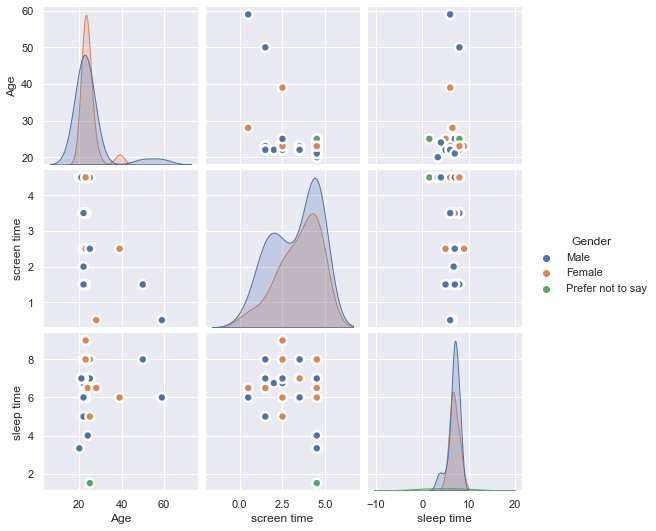

In [8]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="Gender", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [9]:
df.describe()

,Age,screen time,sleep time
count,46.000000,46.000000,46.000000
mean,24.760870,3.380435,6.757500
std,7.021189,1.278822,1.348921
min,20.000000,0.500000,1.500000
25%,22.000000,2.500000,6.125000
50%,23.000000,3.500000,7.000000
75%,24.000000,4.500000,8.000000
max,59.000000,4.500000,9.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               46 non-null     int64  
 1   Gender            46 non-null     object 
 2   meals/day         46 non-null     object 
 3   physical illness  46 non-null     object 
 4   screen time       46 non-null     float64
 5   bluelight filter  46 non-null     object 
 6   sleep direction   46 non-null     object 
 7   exercise          46 non-null     object 
 8   smoke/drink       46 non-null     object 
 9   beverage          46 non-null     object 
 10  sleep time        46 non-null     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 4.1+ KB


# 1. Analytical Methods: Across All Genders and Ages

## 1.1 Data Visualization

### Smartphone Screen Time vs Sleep Duration Across All Genders and Ages (Figure 1.1)

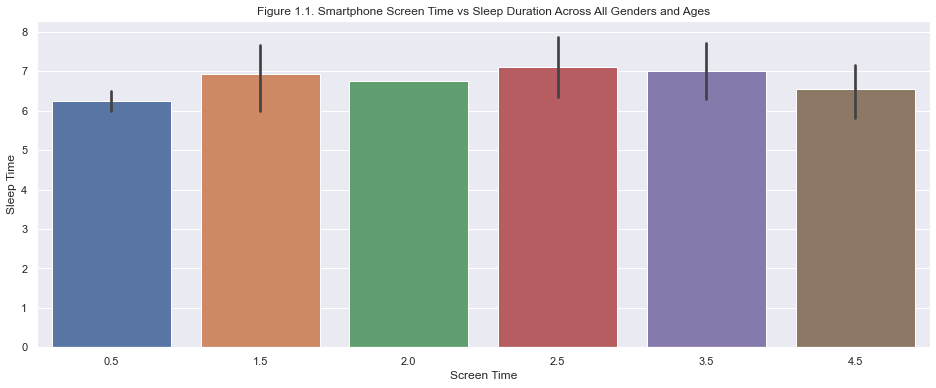

In [52]:
fig_dims = (16, 6)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x='screen time', y='sleep time', data=df).set(xlabel ="Screen Time", ylabel = "Sleep Time",title='Figure 1.1. Smartphone Screen Time vs Sleep Duration Across All Genders and Ages')

## 1.2 OLS Linear Regression

### Regression Summary: Smartphone Screen Time vs Sleep Duration Across All Genders and Ages

In [12]:
X_df = df['screen time']
y_df = df['sleep time']

# Adding a constant to get an intercept
cst_slptime_scrtime_df = sm.add_constant(X_df)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_df, cst_slptime_scrtime_df).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sleep time   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.2554
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.616
Time:                        21:56:43   Log-Likelihood:                -78.401
No. Observations:                  46   AIC:                             160.8
Df Residuals:                      44   BIC:                             164.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.0284      0.572     12.281      0.000       5.875       8.182
screen time    -0.0801      0.159     -0.505      0.616      -0.400       0.239
==============================================================================
Omnibus:                       25.658   Durbin-Watson:                   2.435
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.832
Skew:                          -1.631   Prob(JB):                     6.77e-11
Kurtosis:                       6.714   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear Regression Plot: Smartphone Screen Time vs Sleep Duration Across All Genders and Ages (Figure 1.2)

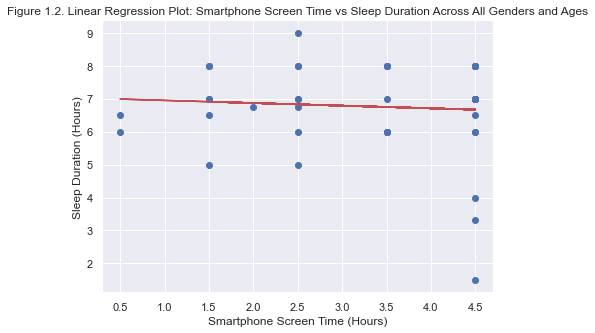

In [56]:
plt.scatter(X_df, y_df)
plt.plot(X_df, 7.0284 + (-0.0801)*X_df, 'r')
plt.title('Figure 1.2. Linear Regression Plot: Smartphone Screen Time vs Sleep Duration Across All Genders and Ages')
plt.xlabel('Smartphone Screen Time (Hours)')
plt.ylabel('Sleep Duration (Hours)')
plt.show()

## 1.3 Residual Analysis

### Smartphone Screen Time vs Sleep Duration Across All Genders and Ages (Figure 1.3 and Figure 1.4)

/Users/hetvipatel/opt/anaconda3/envs/Pandas/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



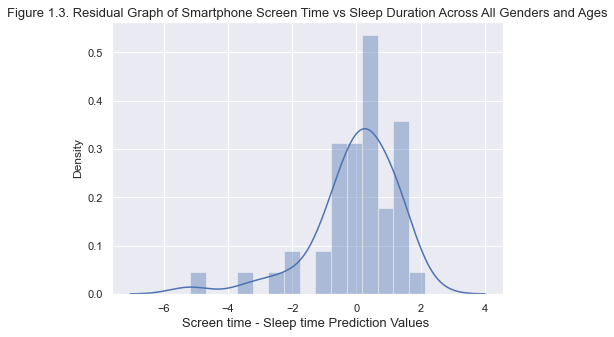

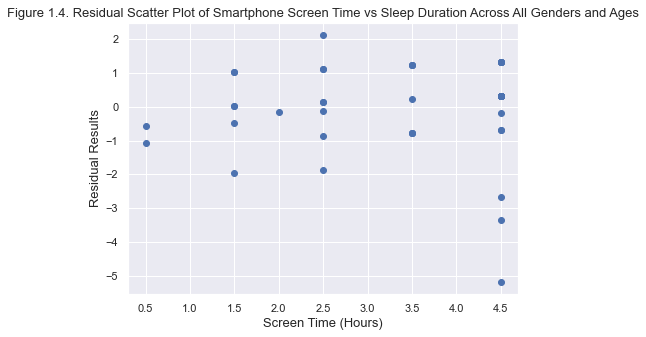

In [69]:
# Predicting y_df using the data of X_df
y_prediction_df = lr.predict(cst_slptime_scrtime_df)

# Creating residuals from the y_prediction_df data and predicted data
res = (y_df - y_prediction_df)

fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Figure 1.3. Residual Graph of Smartphone Screen Time vs Sleep Duration Across All Genders and Ages', fontsize = 13)
plt.xlabel('Screen time - Sleep time Prediction Values ', fontsize = 13)
plt.show()

# Looking for any patterns in the residuals
plt.scatter(X_df,res)
plt.title('Figure 1.4. Residual Scatter Plot of Smartphone Screen Time vs Sleep Duration Across All Genders and Ages', fontsize = 13)
plt.xlabel('Screen Time (Hours)', fontsize = 13)
plt.ylabel('Residual Results', fontsize = 13)
plt.show()

# 2. Analytical Methods: Males

### Creating a Dataframe for Males

In [16]:
df_male= df[df["Gender"]=='Male']
df_male.head()

,Age,Gender,meals/day,physical illness,screen time,bluelight filter,sleep direction,exercise,smoke/drink,beverage,sleep time
0,22,Male,two,no,2.0,yes,west,sometimes,no,Tea,6.7575
2,23,Male,three,no,3.5,no,south,no,no,Tea,8.0000
4,22,Male,three,no,4.5,yes,east,sometimes,yes,Tea and Coffee both,6.0000
5,22,Male,two,no,2.5,yes,west,sometimes,no,Tea,6.7575
6,22,Male,four,no,1.5,yes,south,yes,no,none of the above,7.0000


## 2.1 Data Visualization

### Smartphone Screen Time vs Sleep Duration in Males (Figure 2.1)

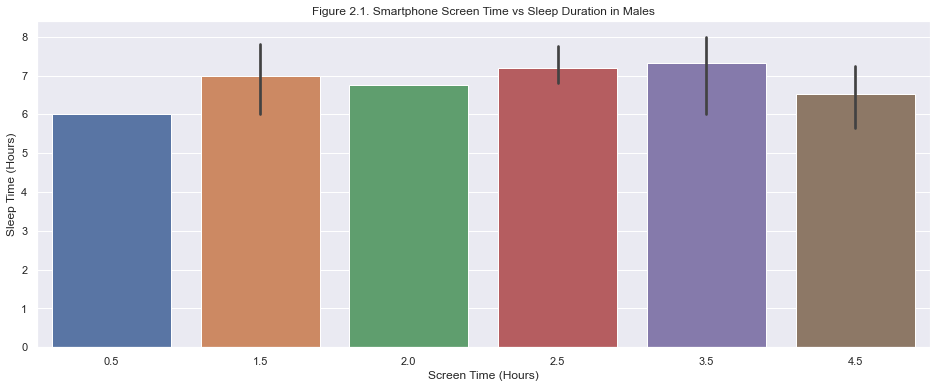

In [63]:
fig_dims = (16, 6)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x='screen time', y='sleep time', data=df_male).set(xlabel ="Screen Time (Hours)", ylabel = "Sleep Time (Hours)",title='Figure 2.1. Smartphone Screen Time vs Sleep Duration in Males')

### Age vs Smartphone Screen Time in Males (Figure 2.2)

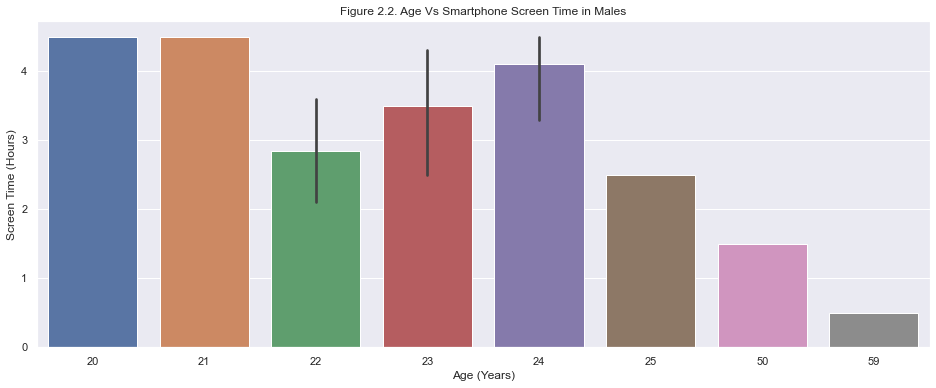

In [62]:
fig_dims = (16, 6)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x='Age', y='screen time', data=df_male).set(xlabel ="Age (Years)", ylabel = "Screen Time (Hours)",title='Figure 2.2. Age Vs Smartphone Screen Time in Males')

## Age vs Sleep Duration in Males (Figure 2.3)

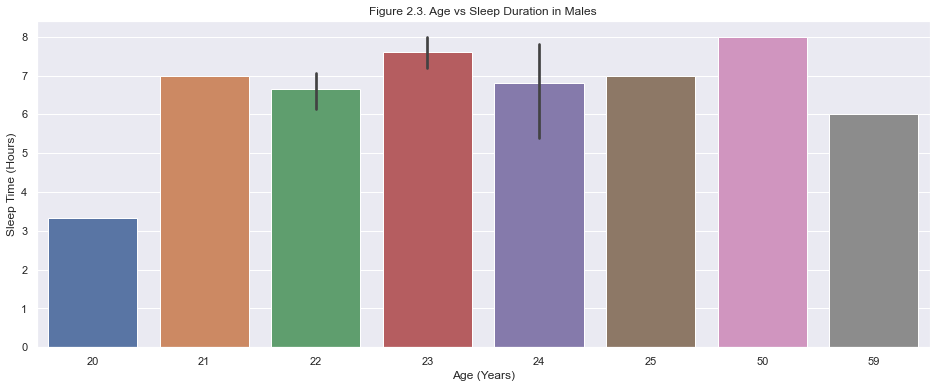

In [64]:
fig_dims = (16, 6)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x='Age', y='sleep time', data=df_male).set(xlabel ="Age (Years)", ylabel = "Sleep Time (Hours)",title='Figure 2.3. Age vs Sleep Duration in Males')

In [65]:
fig = px.pie(
    df_male,
    values='sleep time',
    names="Age",
    title="Figure 2.4. Pie Chart Representation of Age vs Sleep Duration in Males"
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## 2.2 OLS Linear Regression

### Regression Summary: Smartphone Screen Time vs Sleep Duration in Males

In [66]:
X = df_male['screen time']
y = df_male['sleep time']

# Adding a constant to get an intercept
cst_slptime_scrtime = sm.add_constant(X)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y, cst_slptime_scrtime).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sleep time   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                    0.2835
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.599
Time:                        22:24:07   Log-Likelihood:                -40.812
No. Observations:                  26   AIC:                             85.62
Df Residuals:                      24   BIC:                             88.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.1118      0.629     11.310      0.000       5.814       8.410
screen time    -0.0954      0.179     -0.532      0.599      -0.465       0.274
==============================================================================
Omnibus:                       11.408   Durbin-Watson:                   2.513
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                9.861
Skew:                          -1.334   Prob(JB):                      0.00722
Kurtosis:                       4.407   Cond. No.                         9.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear Regression Plot: Smartphone Screen Time vs Sleep Duration in Males (Figure 2.5)

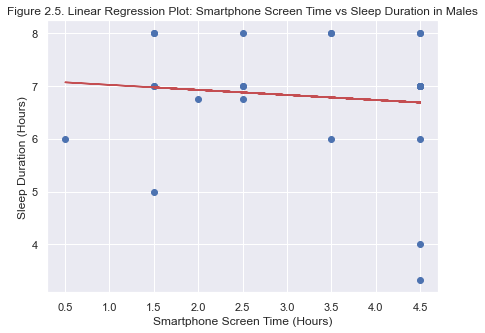

In [68]:
plt.scatter(X, y)
plt.plot(X, 7.1118 + (-0.0954)*X, 'r')
plt.title('Figure 2.5. Linear Regression Plot: Smartphone Screen Time vs Sleep Duration in Males')
plt.xlabel('Smartphone Screen Time (Hours)')
plt.ylabel('Sleep Duration (Hours)')
plt.show()

### Regression Summary: Age vs Sleep Duration in Males

In [23]:
X_age = df_male['Age']
y_sleep_time = df_male['sleep time']

# Adding a constant to get an intercept
cst_slptime_scrtime_age = sm.add_constant(X_age)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_sleep_time, cst_slptime_scrtime_age).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sleep time   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                   0.07803
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.782
Time:                        21:56:45   Log-Likelihood:                -40.922
No. Observations:                  26   AIC:                             85.84
Df Residuals:                      24   BIC:                             88.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6094      0.729      9.070      0.000       5.105       8.113
Age            0.0077      0.028      0.279      0.782      -0.049       0.064
==============================================================================
Omnibus:                       12.722   Durbin-Watson:                   2.417
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               11.600
Skew:                          -1.406   Prob(JB):                      0.00303
Kurtosis:                       4.673   Cond. No.                         81.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear Regression Plot: Age vs Sleep Duration in Males (Figure 2.6)

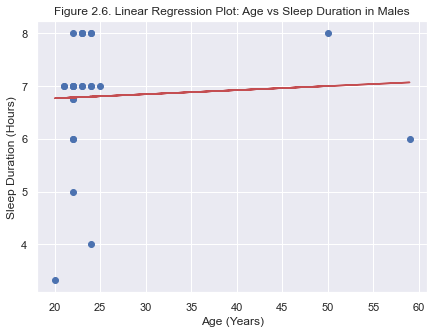

In [70]:
plt.scatter(X_age, y_sleep_time)
plt.plot(X_age, 6.6094 + (0.0077)*X_age, 'r')
plt.title('Figure 2.6. Linear Regression Plot: Age vs Sleep Duration in Males')
plt.xlabel('Age (Years)')
plt.ylabel('Sleep Duration (Hours)')
plt.show()

## 2.3 Residual Analysis

### Smartphone Screen Time vs Sleep Duration in Males (Figure 2.7 and Figure 2.8)

/Users/hetvipatel/opt/anaconda3/envs/Pandas/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



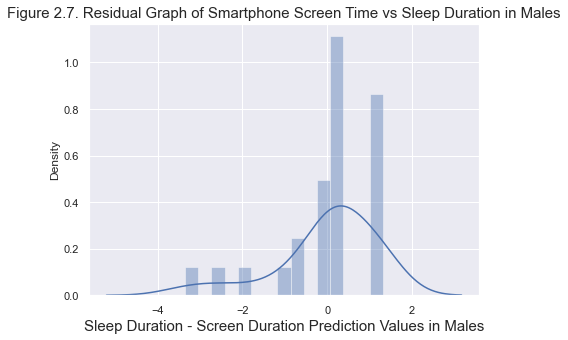

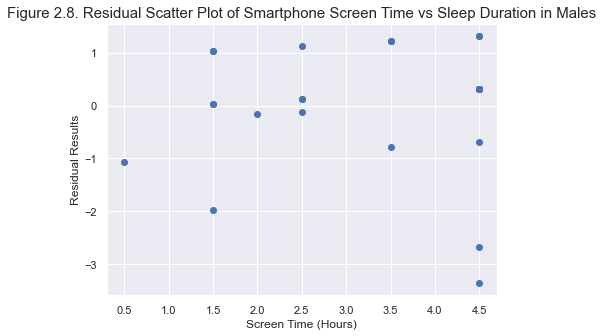

In [72]:
# Predicting y_value using the data of X
y_prediction_male = lr.predict(cst_slptime_scrtime)

# Creating residuals from the y_prediction_male and predicted y data
res = (y - y_prediction_male)

fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Figure 2.7. Residual Graph of Smartphone Screen Time vs Sleep Duration in Males', fontsize = 15)
plt.xlabel('Sleep Duration - Screen Duration Prediction Values in Males', fontsize = 15)
plt.show()

# Looking for any patterns in the residuals
plt.scatter(X,res)
plt.title('Figure 2.8. Residual Scatter Plot of Smartphone Screen Time vs Sleep Duration in Males', fontsize = 15)
plt.xlabel("Screen Time (Hours)")
plt.ylabel("Residual Results")
plt.show()

### Age vs Sleep Duration in Males (Figure 2.9 and Figure 2.10)

/Users/hetvipatel/opt/anaconda3/envs/Pandas/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



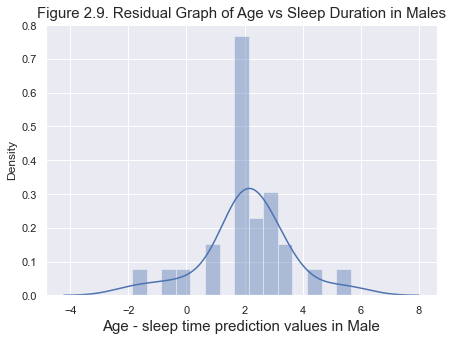

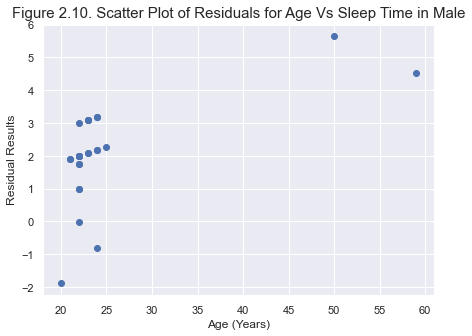

In [73]:
# Predicting y_value using  data of X
y_prediction_male_age = lr.predict(cst_slptime_scrtime_age)

# Creating residuals from the y_prediction_male_age and predicted y data
res = (y_sleep_time - y_prediction_male_age)

fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Figure 2.9. Residual Graph of Age vs Sleep Duration in Males', fontsize = 15)
plt.xlabel('Age - sleep time prediction values in Male', fontsize = 15)
plt.show()

# Looking for any patterns in the residuals
plt.scatter(X_age,res)
plt.title('Figure 2.10. Scatter Plot of Residuals for Age Vs Sleep Time in Male', fontsize = 15)
plt.xlabel("Age (Years)")
plt.ylabel("Residual Results")
plt.show()

# 3. Analytical Methods: Females

### Creating a Dataframe for Females

In [27]:
df_female= df[df["Gender"]=='Female']
df_female.head()

,Age,Gender,meals/day,physical illness,screen time,bluelight filter,sleep direction,exercise,smoke/drink,beverage,sleep time
1,22,Female,three,no,3.5,no,south,no,no,Coffee,8.0
3,23,Female,two,no,1.5,no,east,sometimes,no,Coffee,6.5
7,24,Female,three,yes,4.5,no,east,sometimes,no,Tea,6.5
9,23,Female,three,no,4.5,yes,north,yes,yes,Tea and Coffee both,7.0
10,28,Female,three,no,0.5,yes,north,yes,no,Tea,6.5


## 3.1 Data Visualization

### Smartphone Screen Time vs Sleep Duration in Females (Figure 3.1)

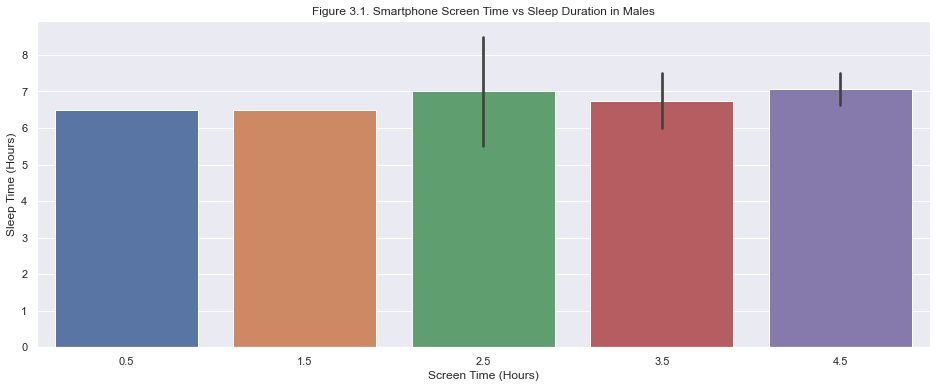

In [74]:
fig_dims = (16, 6)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x='screen time', y='sleep time', data=df_female).set(xlabel ="Screen Time (Hours)", ylabel = "Sleep Time (Hours)",title='Figure 3.1. Smartphone Screen Time vs Sleep Duration in Males')

### Age vs Sleep Duration in Females (Figure 3.2)

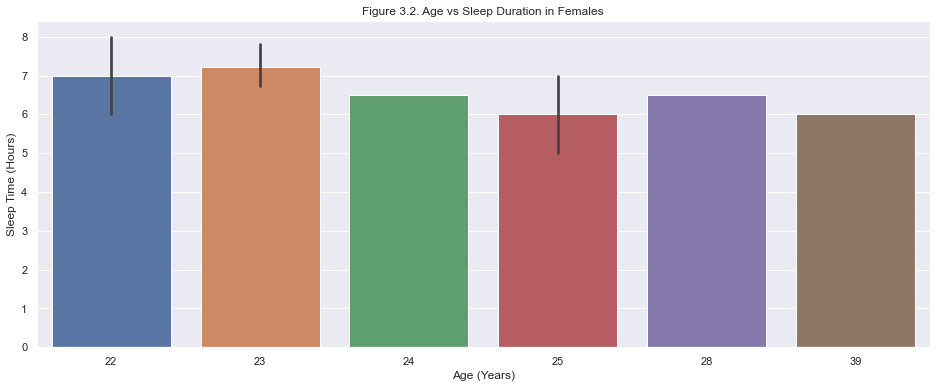

In [75]:
fig_dims = (16, 6)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x='Age', y='sleep time', data=df_female).set(xlabel ="Age (Years)", ylabel = "Sleep Time (Hours)",title='Figure 3.2. Age vs Sleep Duration in Females')

In [76]:
fig = px.pie(
    df_female,
    values='sleep time',
    names="Age",
    title="Figure 3.3. Pie Chart Representation Of Age vs Sleep Duration in Females"
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Age vs Smartphone Screen Time in Females (Figure 3.4)

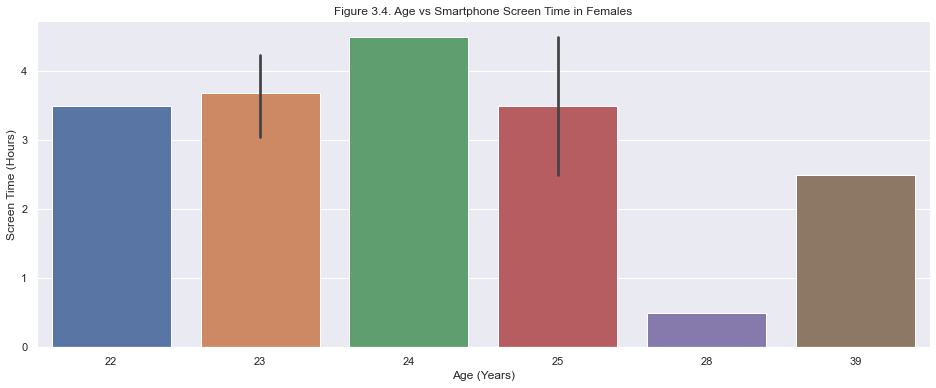

In [77]:
fig_dims = (16, 6)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x='Age', y='screen time', data=df_female).set(xlabel ="Age (Years)", ylabel = "Screen Time (Hours)",title='Figure 3.4. Age vs Smartphone Screen Time in Females')

# 3.2 OLS Linear Regression

### Smartphone Screen Time vs Sleep Duration in Females 

In [33]:
x_female = df_female['screen time']
y_female = df_female['sleep time']

# Adding a constant to get an intercept
cst_slptime_scrtime_female = sm.add_constant(x_female)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_female, cst_slptime_scrtime_female).fit()

lr.summary()

/Users/hetvipatel/opt/anaconda3/envs/Pandas/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=18



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sleep time   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.041
Method:                 Least Squares   F-statistic:                    0.3351
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.571
Time:                        21:56:47   Log-Likelihood:                -24.639
No. Observations:                  18   AIC:                             53.28
Df Residuals:                      16   BIC:                             55.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.5139      0.735      8.859      0.000       4.955       8.073
screen time     0.1169      0.202      0.579      0.571      -0.311       0.545
==============================================================================
Omnibus:                        0.891   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.466
Skew:                           0.387   Prob(JB):                        0.792
Kurtosis:                       2.852   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear Regression Plot: Smartphone Screen Time vs Sleep Duration in Females (Figure 3.4)

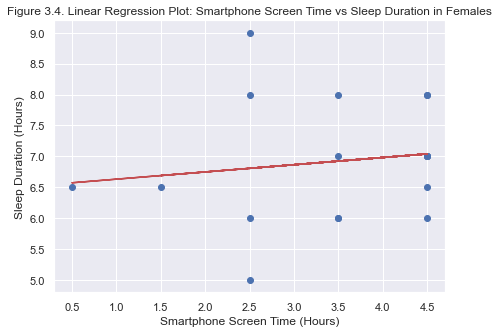

In [83]:
plt.scatter(x_female, y_female)
plt.plot(x_female, 6.5139 + (0.1169)*x_female, 'r')
plt.title('Figure 3.4. Linear Regression Plot: Smartphone Screen Time vs Sleep Duration in Females')
plt.xlabel('Smartphone Screen Time (Hours)')
plt.ylabel('Sleep Duration (Hours)')
plt.show()

### Age vs Sleep Duration in Females

In [35]:
x_female_age = df_female['Age']
y_female_sleep_time = df_female['sleep time']

# Adding a constant to get an intercept
cst_slptime_scrtime_female_age = sm.add_constant(x_female_age)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_female_sleep_time, cst_slptime_scrtime_female_age).fit()

lr.summary()

/Users/hetvipatel/opt/anaconda3/envs/Pandas/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=18



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sleep time   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     1.818
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.196
Time:                        21:56:48   Log-Likelihood:                -23.857
No. Observations:                  18   AIC:                             51.71
Df Residuals:                      16   BIC:                             53.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8821      1.475      6.020      0.000       5.754      12.010
Age           -0.0808      0.060     -1.348      0.196      -0.208       0.046
==============================================================================
Omnibus:                        0.161   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.923   Jarque-Bera (JB):                0.053
Skew:                           0.076   Prob(JB):                        0.974
Kurtosis:                       2.782   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear Regression Plot: Age vs Sleep Duration in Females (Figure 3.5)

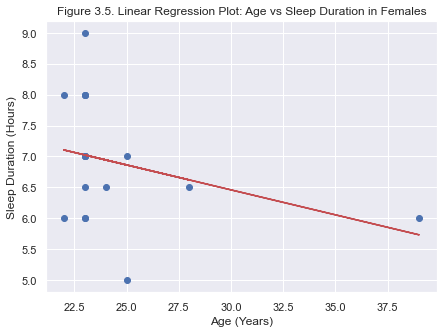

In [84]:
plt.scatter(x_female_age, y_female_sleep_time)
plt.plot(x_female_age, 8.8821 + (-0.0808)*x_female_age, 'r')
plt.title('Figure 3.5. Linear Regression Plot: Age vs Sleep Duration in Females')
plt.xlabel('Age (Years)')
plt.ylabel('Sleep Duration (Hours)')
plt.show()

## 3.3 Residual Analysis

### Smartphone Screen Time vs Sleep Duration in Females

/Users/hetvipatel/opt/anaconda3/envs/Pandas/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



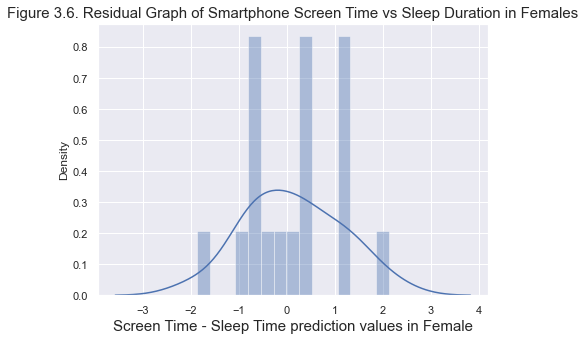

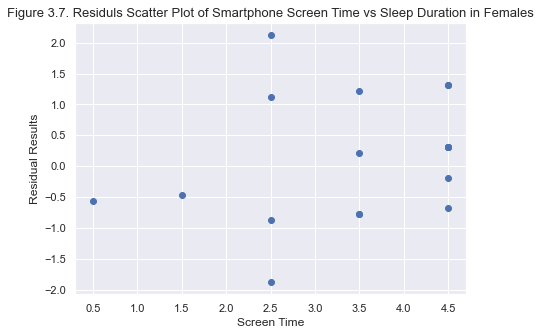

In [85]:
# Predicting y_value using the data of x_female
y_prediction_female = lr.predict(cst_slptime_scrtime_female)

# Creating residuals from the y_prediction_female and predicted y data
res = (y_female - y_prediction_female)

fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Figure 3.6. Residual Graph of Smartphone Screen Time vs Sleep Duration in Females', fontsize = 15)
plt.xlabel('Screen Time - Sleep Time prediction values in Female', fontsize = 15)
plt.show()

# Looking for any patterns in the residuals
plt.scatter(x_female,res)
plt.title('Figure 3.7. Residuls Scatter Plot of Smartphone Screen Time vs Sleep Duration in Females', fontsize = 13)
plt.xlabel("Screen Time")
plt.ylabel("Residual Results")
plt.show()

### Age Vs Sleep Duration in Females

/Users/hetvipatel/opt/anaconda3/envs/Pandas/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



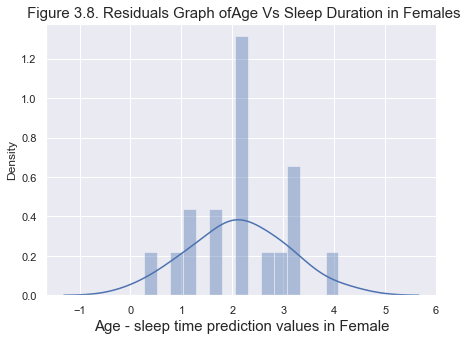

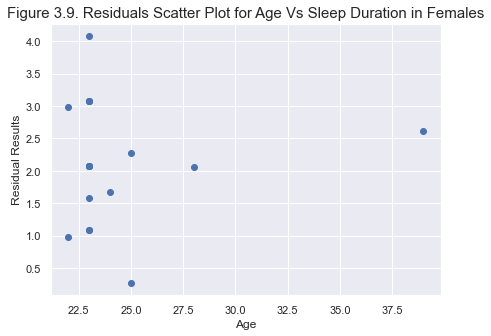

In [86]:
# Predicting y_value using the data of x_female_age
y_prediction_female_age = lr.predict(cst_slptime_scrtime_female_age)

# Creating residuals from the y_prediction_female_age and predicted y data
res = (y_female_sleep_time - y_prediction_female_age)

fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title(' Figure 3.8. Residuals Graph ofAge Vs Sleep Duration in Females', fontsize = 15)
plt.xlabel('Age - sleep time prediction values in Female', fontsize = 15)
plt.show()

# Looking for any patterns in the residuals
plt.scatter(x_female_age,res)
plt.title('Figure 3.9. Residuals Scatter Plot for Age Vs Sleep Duration in Females', fontsize = 15)
plt.xlabel("Age")
plt.ylabel("Residual Results")
plt.show()

# 4. Visualization of Smartphone Screen Time vs Sleep Duration Across all Genders (Figure 4)

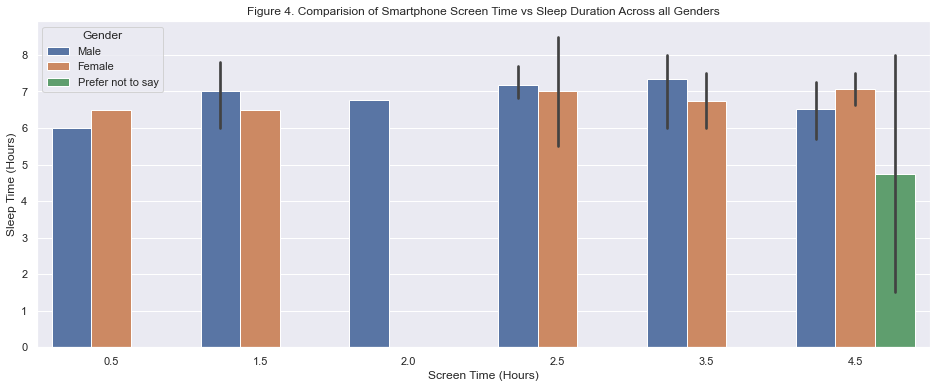

In [91]:
fig_dims = (16, 6)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x='screen time', y='sleep time', hue='Gender', data=df).set(xlabel='Screen Time (Hours)',ylabel='Sleep Time (Hours)',title='Figure 4. Comparision of Smartphone Screen Time vs Sleep Duration Across all Genders')

# 5. Visualization of Age vs Sleep Duration Across all Genders (Figure 5)

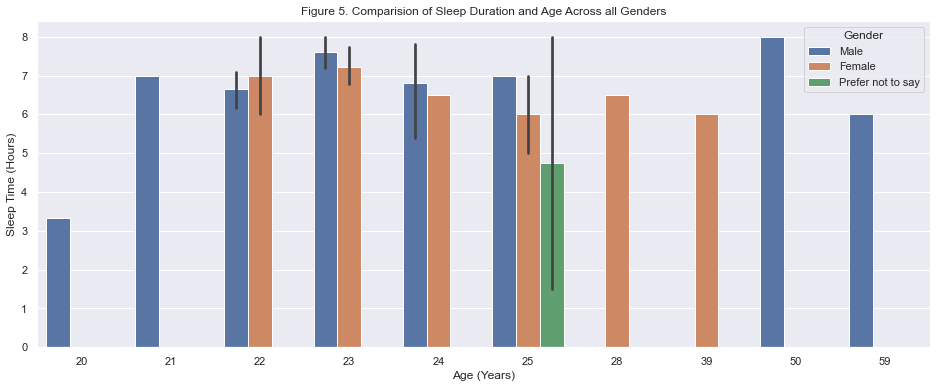

In [92]:
fig_dims = (16, 6)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x='Age', y='sleep time', hue='Gender', data=df).set(xlabel='Age (Years)', ylabel='Sleep Time (Hours)',title='Figure 5. Comparision of Sleep Duration and Age Across all Genders')

# 6. Visualization of Age and Smartphone Screen Time Across all Genders (Figure 6)

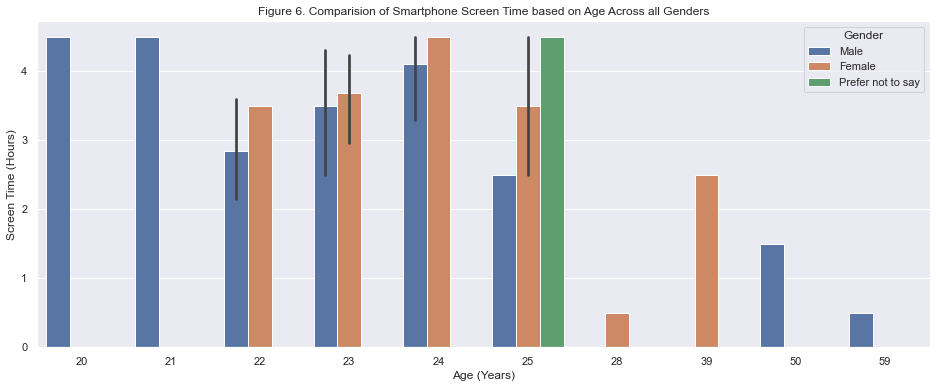

In [93]:
fig_dims = (16, 6)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x='Age', y='screen time', hue='Gender', data=df).set(xlabel='Age (Years)',ylabel='Screen Time (Hours)',title='Figure 6. Comparision of Smartphone Screen Time based on Age Across all Genders')

# 7. Descriptive Statistical Analysis

### Descriptive Statistical Analysis of Males and Females and their Smartphone Screen Time Usage and Sleep Duration 

In [42]:
male = df.query('Gender == "Male"')['Age']
female = df.query('Gender == "Female"')['Age']
df.groupby('Gender').describe()

Age                                                      \
                  count       mean       std   min   25%   50%    75%   max   
Gender                                                                        
Female             18.0  24.333333  3.910769  22.0  23.0  23.0  23.75  39.0   
Male               26.0  25.038462  8.838465  20.0  22.0  22.5  24.00  59.0   
Prefer not to say   2.0  25.000000  0.000000  25.0  25.0  25.0  25.00  25.0   

                  screen time            ...           sleep time            \
                        count      mean  ...  75%  max      count      mean   
Gender                                   ...                                  
Female                   18.0  3.444444  ...  4.5  4.5       18.0  6.916667   
Male                     26.0  3.250000  ...  4.5  4.5       26.0  6.801731   
Prefer not to say         2.0  4.500000  ...  4.5  4.5        2.0  4.750000   

                                                             
                        std   min     25%   50%    75%  max  
Gender                                                       
Female             0.988909  5.00  6.1250  7.00  7.750  9.0  
Male               1.192718  3.33  6.7575  7.00  7.750  8.0  
Prefer not to say  4.596194  1.50  3.1250  4.75  6.375  8.0  

[3 rows x 24 columns]

### Descriptive Statistical Analysis of Blue Light Filter Usage and Effect on Smartphone Screen Time and Sleep Duration Across All Genders and Ages

In [44]:
df = df.rename(columns={'bluelight filter': 'filter'})
yes = df.query('filter == "yes"')['Age']
no = df.query('filter == "no"')['Age']
df.groupby('filter').describe()

Age                                                    screen time  \
       count       mean       std   min   25%   50%   75%   max       count   
filter                                                                        
no      21.0  25.904762  9.684548  20.0  22.0  23.0  24.0  59.0        21.0   
yes     25.0  23.800000  3.488075  21.0  22.0  23.0  24.0  39.0        25.0   

              ...           sleep time                                      \
        mean  ...  75%  max      count      mean       std   min  25%  50%   
filter        ...                                                            
no      3.50  ...  4.5  4.5       21.0  6.872857  1.257566  3.33  6.0  7.0   
yes     3.28  ...  4.5  4.5       25.0  6.660600  1.439586  1.50  6.5  7.0   

                  
        75%  max  
filter            
no      8.0  9.0  
yes     7.0  8.0  

[2 rows x 24 columns]

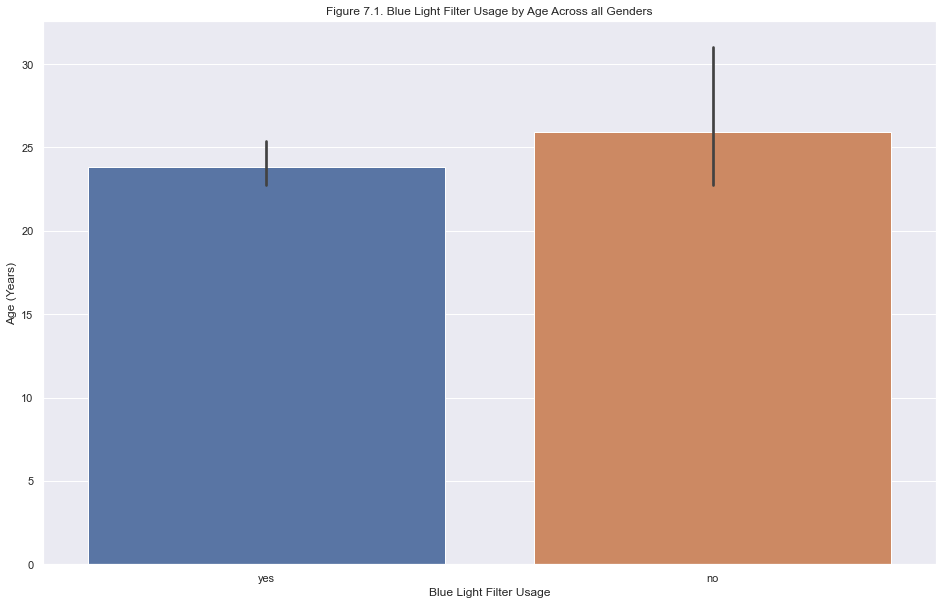

In [106]:
fig_dims = (16, 10)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x='filter', y='Age',data=df).set(xlabel='Blue Light Filter Usage',ylabel='Age (Years)',title='Figure 7.1. Blue Light Filter Usage by Age Across all Genders')

### Descriptive Statistical Analysis of Blue Light Filter Usage and Sleep Duration Across Genders

In [46]:
y = df.loc[df['filter'] == 'yes']['Gender']
n = df.loc[df['filter'] == 'no']['Gender']
col =[]
for val in df['Gender']:
    if val=='Male':
        col.append(1)
    else:
        col.append(0)
# col = [1 for val in df['Gender'] val ='Male' else 0 ]
df['Gender_binary'] = col

In [47]:
df.groupby('filter').describe()

Age                                                    screen time  \
       count       mean       std   min   25%   50%   75%   max       count   
filter                                                                        
no      21.0  25.904762  9.684548  20.0  22.0  23.0  24.0  59.0        21.0   
yes     25.0  23.800000  3.488075  21.0  22.0  23.0  24.0  39.0        25.0   

              ... sleep time      Gender_binary                               \
        mean  ...        75%  max         count     mean       std  min  25%   
filter        ...                                                              
no      3.50  ...        8.0  9.0          21.0  0.52381  0.511766  0.0  0.0   
yes     3.28  ...        7.0  8.0          25.0  0.60000  0.500000  0.0  0.0   

                       
        50%  75%  max  
filter                 
no      1.0  1.0  1.0  
yes     1.0  1.0  1.0  

[2 rows x 32 columns]

In [48]:
df.groupby('filter')['Gender'].describe()

,count,unique,top,freq
filter,,,,
no,21,2,Male,11
yes,25,3,Male,15


### Descriptive Statistical Analysis of Genders, Sleep Duration, and Smartphone Screen Time Using Blue Light Filter

In [49]:
male = df.query('Gender == "Male"')['filter']
female = df.query('Gender == "Female"')['filter']
df.groupby('Gender').describe()

Age                                                      \
                  count       mean       std   min   25%   50%    75%   max   
Gender                                                                        
Female             18.0  24.333333  3.910769  22.0  23.0  23.0  23.75  39.0   
Male               26.0  25.038462  8.838465  20.0  22.0  22.5  24.00  59.0   
Prefer not to say   2.0  25.000000  0.000000  25.0  25.0  25.0  25.00  25.0   

                  screen time            ... sleep time      Gender_binary  \
                        count      mean  ...        75%  max         count   
Gender                                   ...                                 
Female                   18.0  3.444444  ...      7.750  9.0          18.0   
Male                     26.0  3.250000  ...      7.750  8.0          26.0   
Prefer not to say         2.0  4.500000  ...      6.375  8.0           2.0   

                                                      
                  mean  std  min  25%  50%  75%  max  
Gender                                                
Female             0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Male               1.0  0.0  1.0  1.0  1.0  1.0  1.0  
Prefer not to say  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[3 rows x 32 columns]

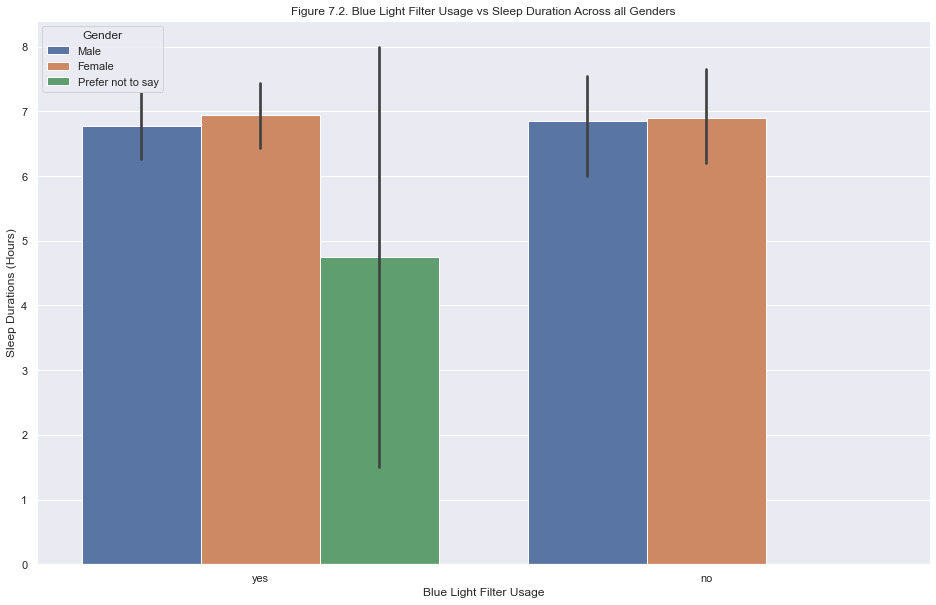

In [107]:
fig_dims = (16, 10)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x='filter', y='sleep time',hue='Gender',data=df).set(xlabel='Blue Light Filter Usage',ylabel='Sleep Durations (Hours)',title='Figure 7.2. Blue Light Filter Usage vs Sleep Duration Across all Genders')